<a href="https://www.kaggle.com/vitriaazevedo/credit-eda-and-analysis?scriptVersionId=88342284" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Exploração e Análise de Dados de Crédito com SQL

### Dados:
Contaremos com os dados dos clientes, esses dados são as informações que nos irá proporcionar essa "**aventura**":

* idade = idade do cliente;
* sexo = sexo do cliente (F ou M);
* dependentes = número de dependentes do cliente;
* escolaridade = nível de escolaridade dos clientes;
* salario_anual = faixa salarial do cliente;
* tipo_cartao = tipo de cartao do cliente;
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses;
* iteracoes_12m = quantidade de iteracoes/transacoes nos últimos 12 meses;
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo;
* limite_credito = limite de credito do cliente;
* valor_transacoes_12m = valor das transações dos ultimos 12 meses;
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses.

A tabela "credito" foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

**Quais são as funções para a conversão de tipos?**

Query: describe credito

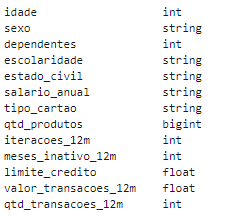

## Exploração de Dados:

Já vimos a introdução dos personagens principais dessa trama e agora vamos nos aventurar com eles:

**Qual a quantidade de informações que temos na Base de Dados?**

Query: SELECT count(**)* FROM credito

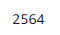

**bastidores:** A base de dados utilizada contém mais linhas e mais dados do que a que estamos utlizando para fazer a exploração e análise de dados. A maior quantidade de dados nos possibilita fazer uma análise concreta. A redução de dados para análise foi para fins de estudo.

Query: SELECT * FROM credito LIMIT 10;

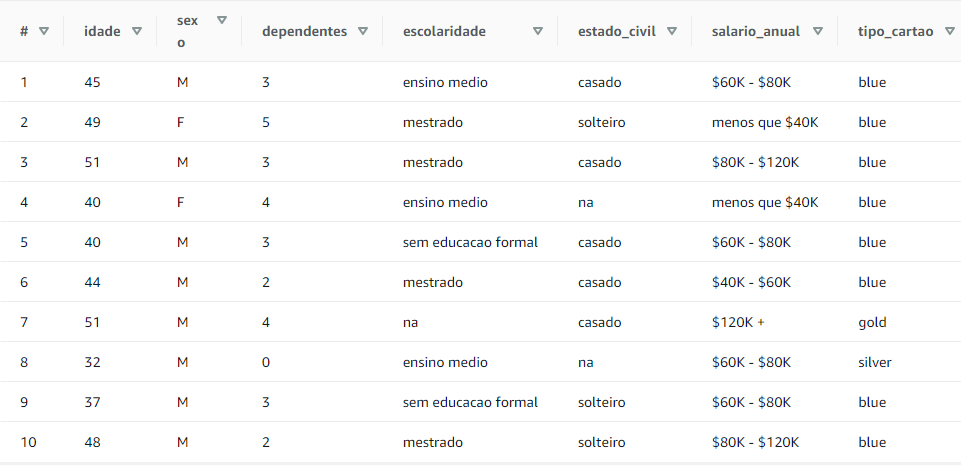
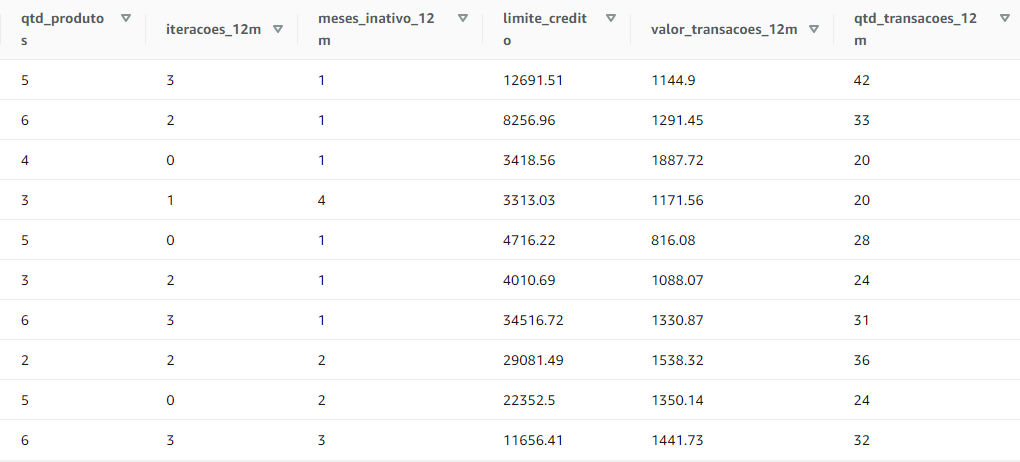

*Bom, parece que estão aparecendo alguns figurantes, notou? vou dar uma dica! (são os valores nulos) continuaremos a análise para saber se há mais deles participando da trama.* 

**Quais são os tipos de escolaridades disponíveis no DataSet?**

Query: SELECT DISTINCT escolaridade FROM credito

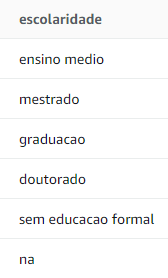

*Os dados nos apresentou os níveis de escolaridade, mas o que o figurante está fazendo ali?*
*Há mais deles? Onde?*

**Quais são os tipos de estado cívil diponíveis no DataSet?**

Query: SELECT DISTINCT estado_civil FROM credito

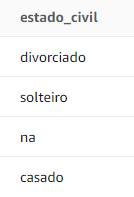

*Calma! Acho que se continuarmos analisando encontraremos uma explicação!(espero)*

**Quais são os tipos de salário anual disponíveis no DataSet?**

Query: SELECT DISTINCT salario_anual FROM credito

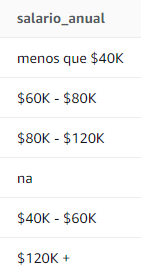

*Recebemos a faixa salarial de cada um, não o salário exato, será que os figurantes tem algo relacionado com isso? EU acho que não, não pode ser!*
*Mas eles ainda continuam aparecendo... teremos que nos aventurar mais...*

**Quais os tipos de cartões disponíveis no DataSet?**

Query: SELECT DISTINCT tipo_cartao FROM credito

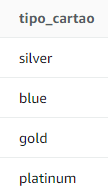

*Os figurantes, (valores nulos) não estão aqui...*

## Análise de Dados

É necessário explorar, pesquisar e análisar os dados, são diversas informações que precisam ser entendidas, e para entende-lás é importante fazer o necessário.

*como fazemos isso? perguntando é um começo...*

**No banco de dados utilizado, quantos clientes temos de cada faixa salarial?**

Query: SELECT count(*), salario_anual FROM credito GROUP BY salario_anual

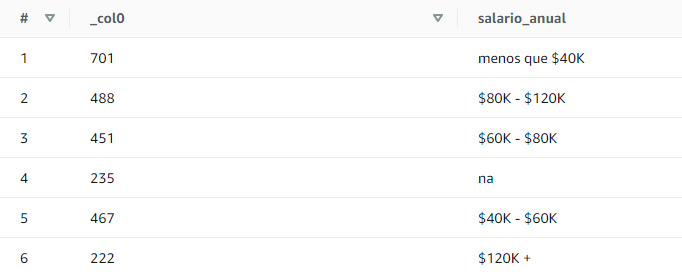

*A maioria dos clientes dessa base de dados possui um renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial. É uma chance da empresa focar nesses grupos e procurar entender o que pode ser feito e encontrar uma forma para o fazer. É interessante trazer mais pessoas? atingir mais públicos?.*

**Quantos clientes são homens e quantos são mulheres?**

Query: SELECT count(*), sexo FROM credito GROUP BY sexo

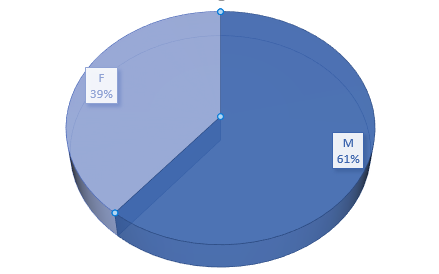

**bastidores:**com a extração do .csv foi possível criar esse gráfico.

*Nota-se que a maioria dos clientes são homens. Vamos averiguar o que nos trás esses resultados atráves da análise.*

**Quais os menores e os maiores salários a partir do sexo?**

Query: SELECT max(salario_anual) AS maior_salario, min(salario_anual) AS menor_salario, sexo
FROM credito
GROUP BY sexo

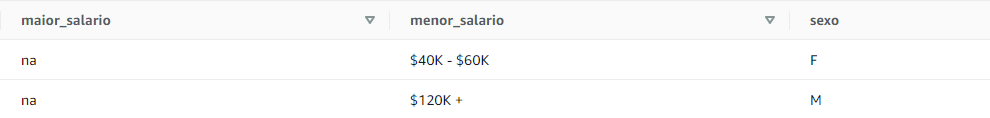

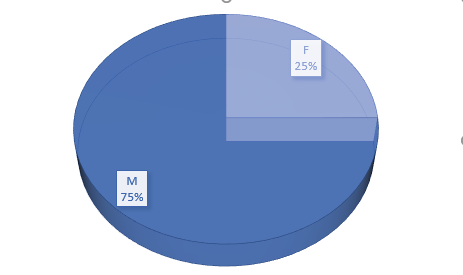

**E se quisessemos focar o nosso marketing de maneira organizada para nossos clientes, qual será a idade deles?**

Query: SELECT avg(idade) AS media_idade, min(idade) AS min_idade, max(idade) AS max_idade, sexo FROM credito GROUP BY sexo

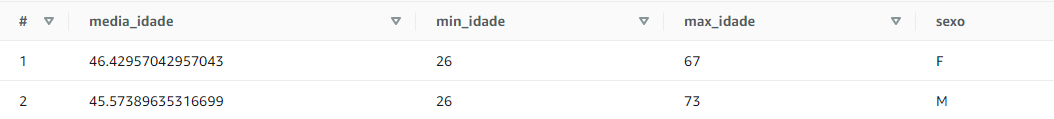

*Não obtivemos informações tão relativas, mas, tudo pode ser aproveitado, ao menos sabemos que nosso público é adulto e a diferença entre a idade mínima e a máxima.*

**Quais as características dos clientes que possuem os maiores creditos?**

Query: SELECT max(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo 
FROM credito 
WHERE escolaridade != 'na' AND tipo_cartao != 'na' 
GROUP BY escolaridade, tipo_cartao, sexo 
ORDER BY limite_credito desc LIMIT 10

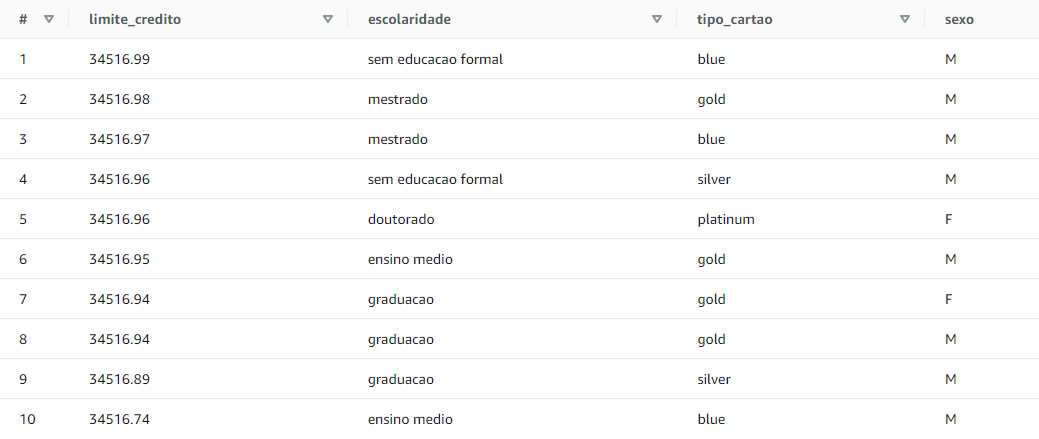

*O impacto da escolaridade no limite é módico. O limite mais alto é oferecido para um homem sem educação formal. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue.*

**Quais as características dos clientes que possuem os menores creditos?**

Query: SELECT max(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo 
FROM credito 
WHERE escolaridade != 'na' 
AND tipo_cartao != 'na' 
GROUP BY escolaridade, tipo_cartao, sexo 
ORDER BY limite_credito asc

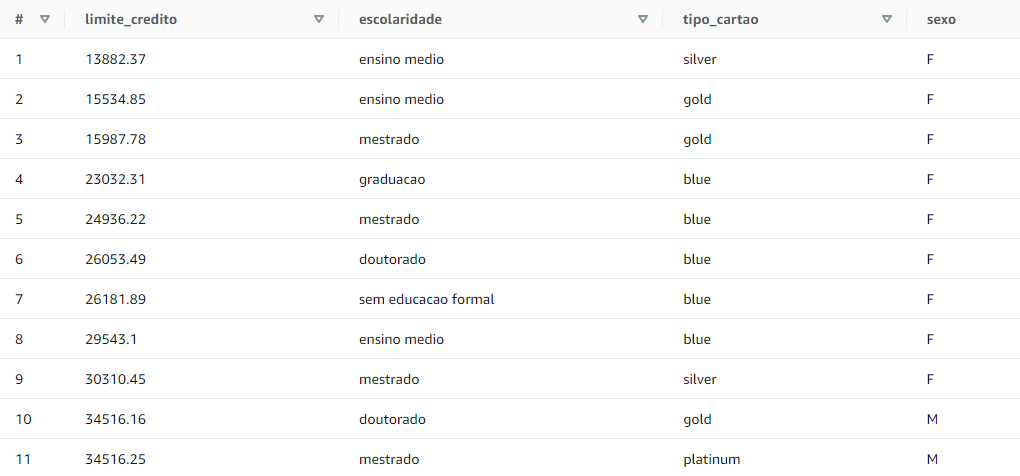

*Dessa vez conseguimos perceber que não há clientes com cartão platinum dentre os menores limites. Também foi possível perceber que a maioria dos menores limites são mulheres enquanto nos maiores limites predomina homens.*

**Será que as mulheres gastam mais?**

Query: SELECT max(valor_transacoes_12m) AS maior_valor_gasto, avg(valor_transacoes_12m) AS media_valor_gasto, min(valor_transacoes_12m) AS min_valor_gasto, sexo 
FROM credito 
GROUP BY sexo

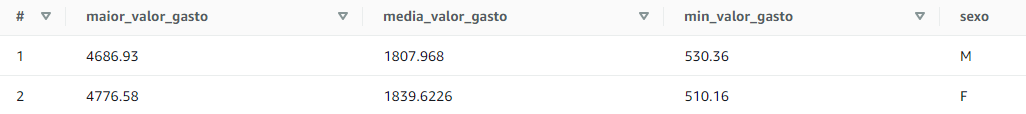

*Apesar da diferença nos limites, os gastos de homens e mulheres são parecidos!*

Chegando ao fim dessa "aventura", **O Sálario causa impacto no limite?**

Query: SELECT avg(qtd_produtos) AS qts_produtos, avg(valor_transacoes_12m) AS media_valor_transacoes, avg(limite_credito) AS media_limite, sexo, salario_anual 
FROM credito 
WHERE salario_anual != 'na' 
GROUP BY sexo, salario_anual 
ORDER BY avg(valor_transacoes_12m) desc

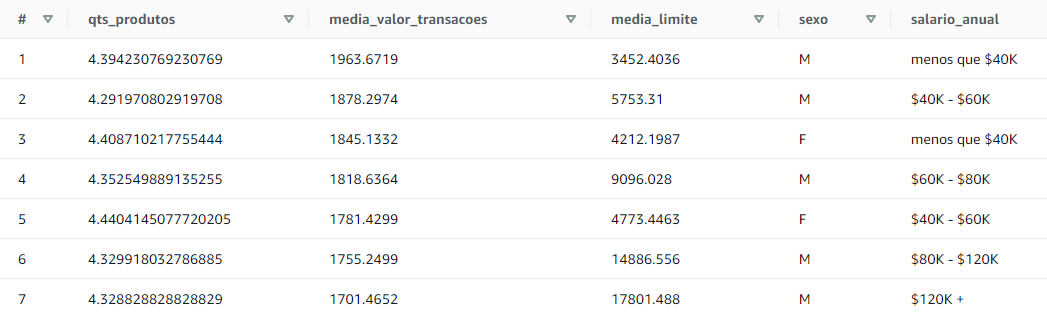

*A resposta é, sim, as pessoas que possuem menor faixa salarial, apresenta menor limite.* **Lembrança dos bastidores: faixa salarial não é o mesmo que o salário exato.** 


## Conclusão

E aqui estão apenas algumas análises extraídas da trama que nos aventuramos no DataSet de credito.

Alguns insights interessantes:

* a maior parte dos clientes possui renda até 40K;
* a maior parte dos clientes é masculino;
* a escolaridade não parece influenciar no limite nem no tipo do cartão;
* os clientes com maiores limites são em sua maioria homens;
* a faixa salarial impacta diretamente no limite de crédito;
* nao existem clientes com salário anual acima de 60K do sexo feminino;

**Uma exploração maior dos dados pode explicar porque as mulheres tem menor crédito. Isso também pode ser um problema cultural que pode ser repensado!**